In [347]:
# import os

# os.environ["KAGGLE_CONFIG_DIR"] = "/home/luna/.kaggle"

In [348]:
# !kaggle competitions download -c home-data-for-ml-course

In [349]:
# !unzip home-data-for-ml-course

In [350]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [351]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [352]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [353]:
test_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
724,2185,85,RL,64.0,12102,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Family
1250,2711,80,RL,100.0,14330,Pave,NaN,IR1,Low,AllPub,...,0,800,Gd,GdPrv,NaN,0,1,2006,WD,Normal
1160,2621,60,RL,NaN,13041,Pave,NaN,IR2,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal
1003,2464,70,RM,47.0,7755,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,5,2007,WD,Normal
1278,2739,80,RL,NaN,12700,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [354]:
train_data.set_index('Id', inplace=True)
test_data.set_index('Id', inplace=True)

In [355]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [356]:
train_data.shape, test_data.shape

((1460, 80), (1459, 79))

#### Exploring Missing Values

In [357]:
null_columns_count = train_data.isnull().sum()
null_columns_count = null_columns_count[null_columns_count > 0]
print("Null value percentages:\n", null_columns_count / train_data.shape[0] * 100)

Null value percentages:
 LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [358]:
def plot_missing(data, title="Plot of missing values"):
    plt.figure(figsize=(28,10))
    sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tick_params(labeltop=True, labelright=True)
    plt.xticks(rotation=90)
    plt.title(title)
    # for i in range(train_data.shape[1]):
    #     plt.axvline(x=i, color='black', linestyle='--')

    plt.vlines(x=np.arange(0, data.shape[1]), ymin=0, ymax=data.shape[0], color='black', linestyle='--')
    plt.show()

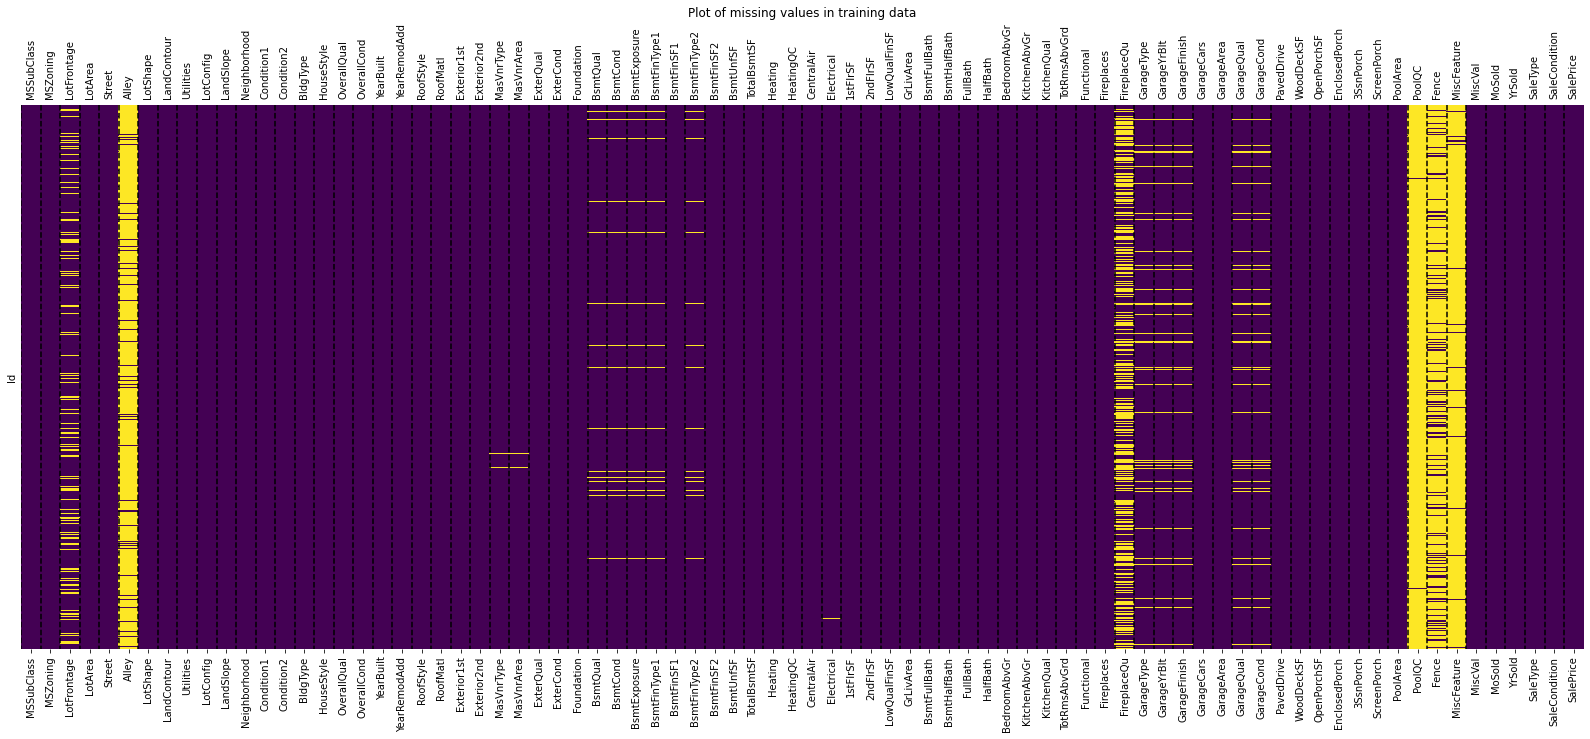

In [359]:
plot_missing(train_data, title="Plot of missing values in training data")

#### Observations:
- _Alley, PoolQC, Fence, MiscFeature_ contains the most number of missing values. It's highly beneficial to drop these.
- _FireplaceQu_ also has around 47% perecent missing values. It's better to remove this column.
- _LotFrontage_ also has around 17% missing values. But the LotFrontage might be a good indicator of the price. We'll check the correlation later and we'll drop this is necessary.

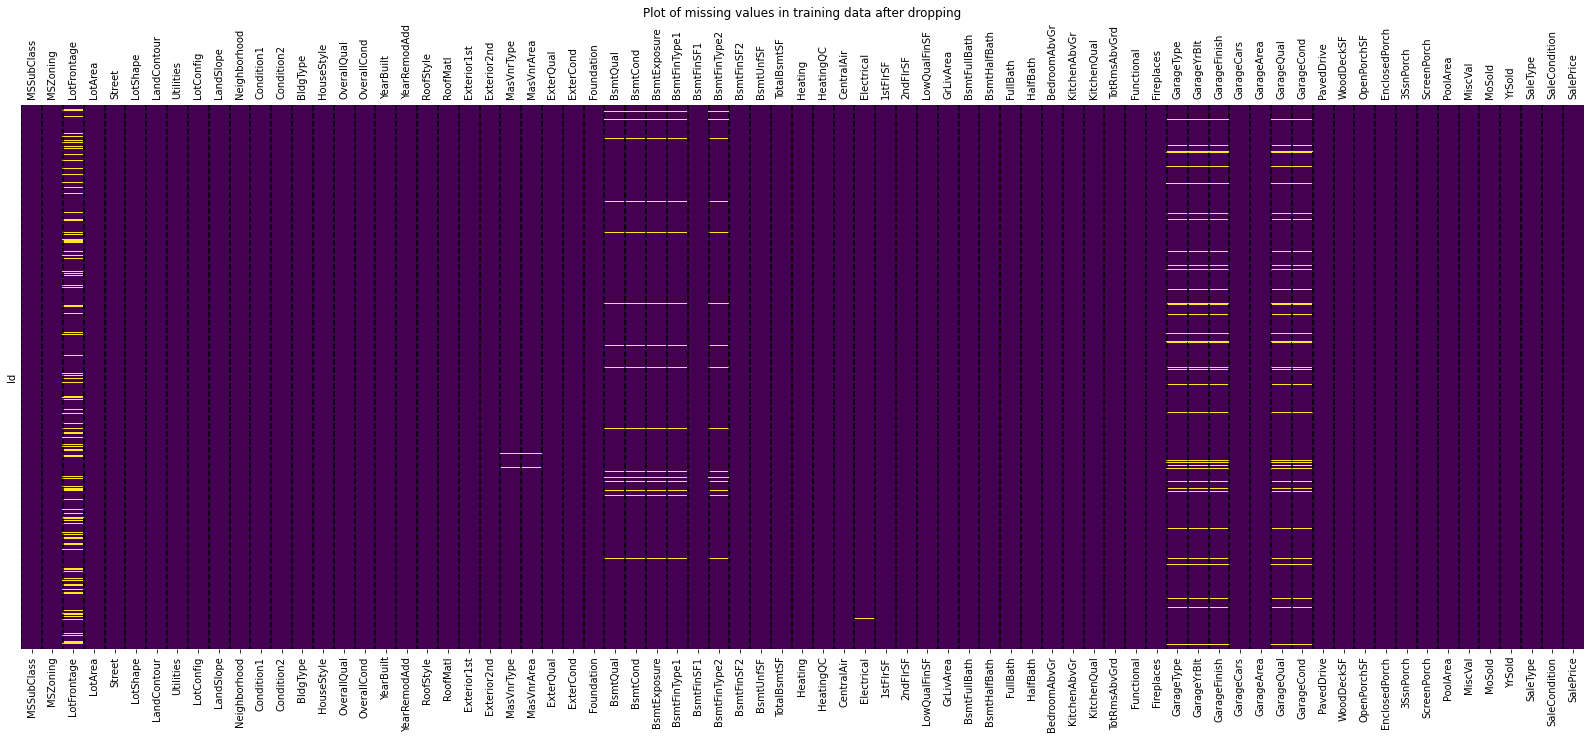

In [360]:
# Drop missing columns
train_data = train_data.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature"])
train_data = train_data.drop(columns=["FireplaceQu"])
plot_missing(train_data, title="Plot of missing values in training data after dropping")

The next thing we need to do is to impute the missing values. Imputation is the process of filling the missing values with some reasonable values.

For numerical data, we can impute the missing values with the mean or median of the column. The most common imputation method is the mean.

For categorical data, we can impute the missing values with the most common value in the column or simply put, the mode.

In [361]:
# Check categorical and numerical columns
categorical_columns = train_data.select_dtypes(include=['object']).columns
numerical_columns = train_data.select_dtypes(include=['int64', 'float64']).columns
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Numerical columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',

Imputing missing value

In [362]:
from sklearn.impute import SimpleImputer, KNNImputer

numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_data[numerical_columns] = numerical_imputer.fit_transform(train_data[numerical_columns])

categorical_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
train_data[categorical_columns] = categorical_imputer.fit_transform(train_data[categorical_columns])

categorical_imputer = SimpleImputer(missing_values="None", strategy='most_frequent')
train_data[categorical_columns] = categorical_imputer.fit_transform(train_data[categorical_columns])


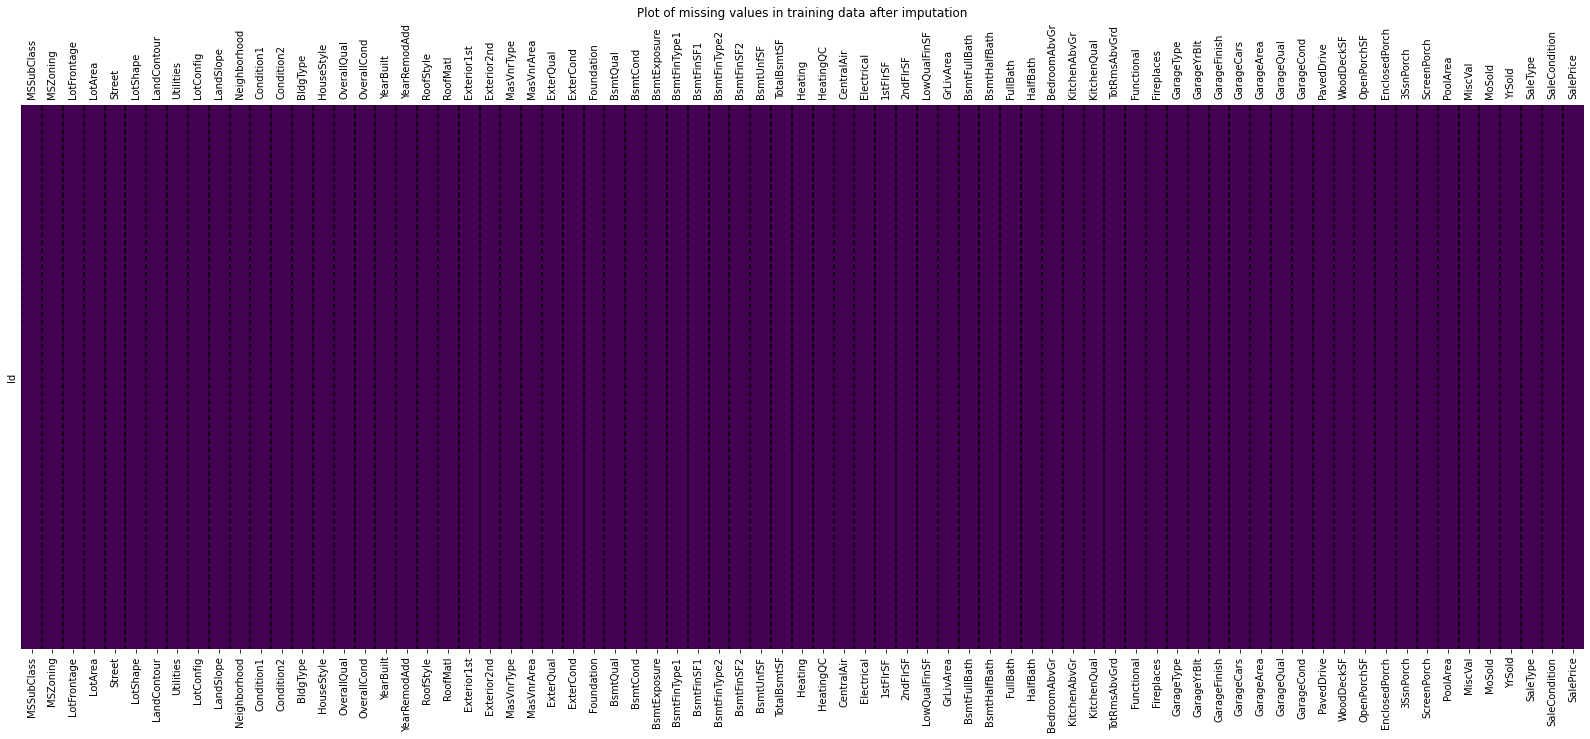

In [363]:
plot_missing(train_data, title="Plot of missing values in training data after imputation")

We also need to take care of test data

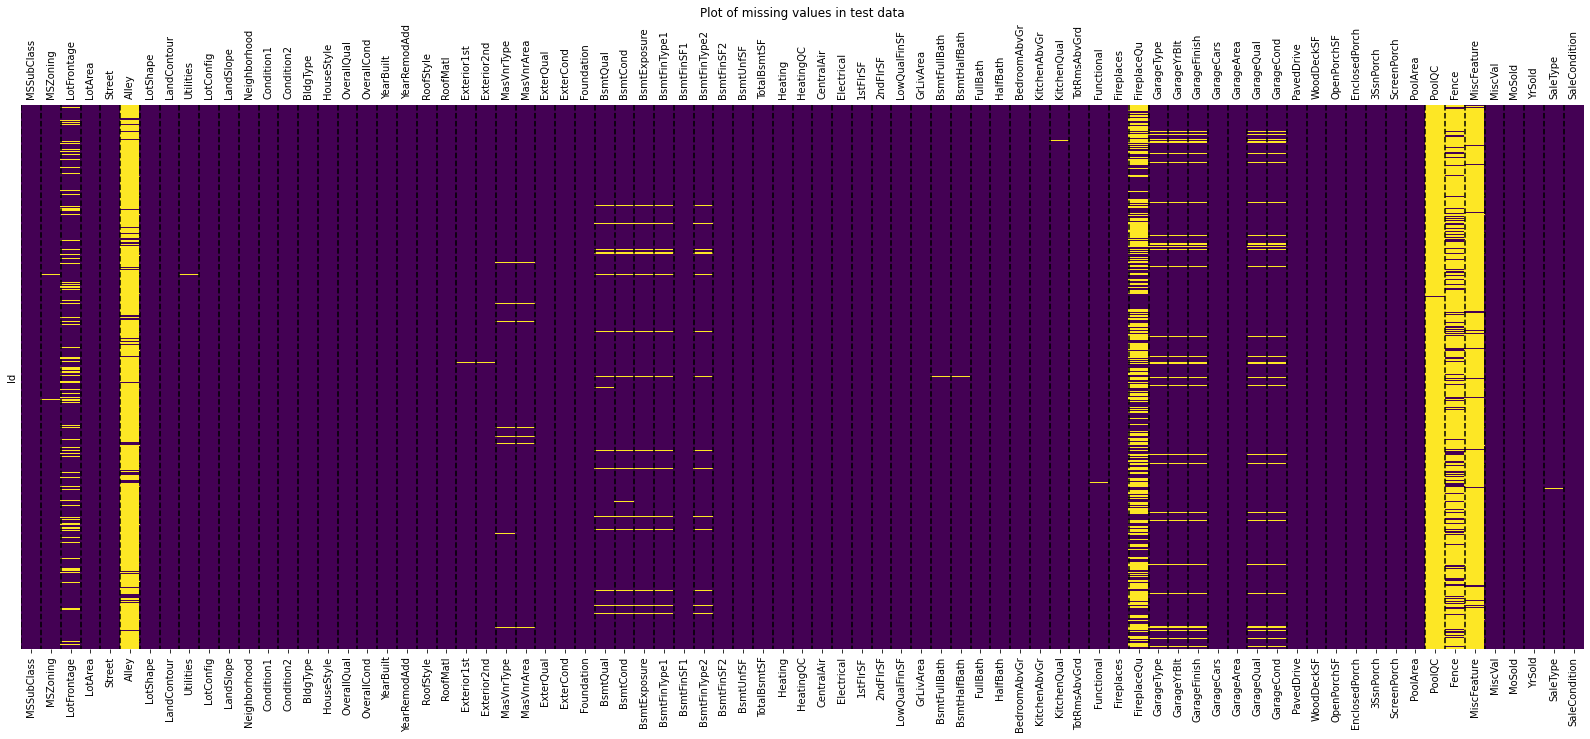

In [364]:
plot_missing(test_data, title="Plot of missing values in test data")

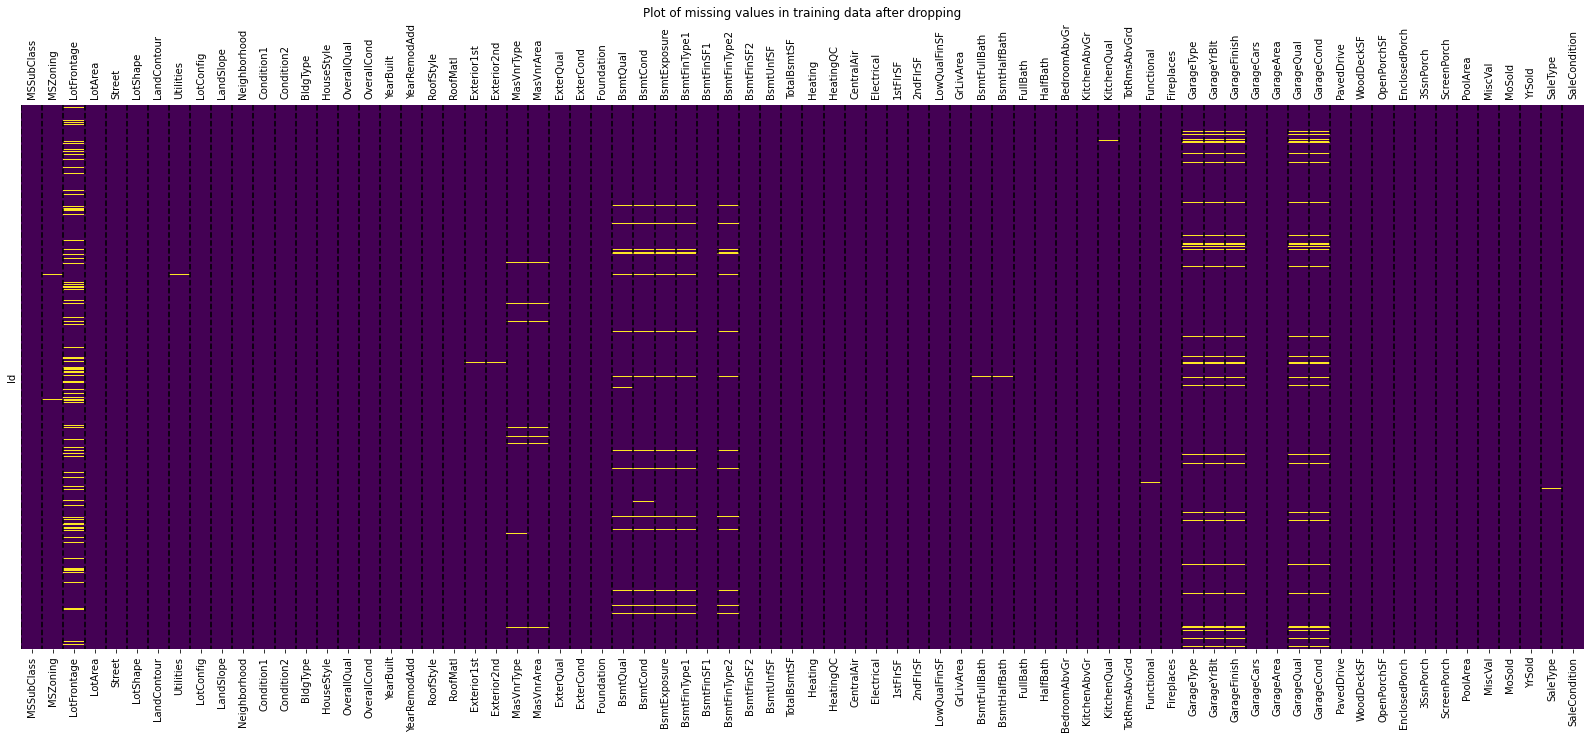

In [365]:
# Drop missing columns
test_data = test_data.drop(columns=["Alley", "PoolQC", "Fence", "MiscFeature"])
test_data = test_data.drop(columns=["FireplaceQu"])
plot_missing(test_data, title="Plot of missing values in training data after dropping")

In [366]:
categorical_columns = test_data.select_dtypes(include=['object']).columns
numerical_columns = test_data.select_dtypes(include=['int64', 'float64']).columns
print("Categorical columns:", categorical_columns)
print("Numerical columns:", numerical_columns)

Categorical columns: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')
Numerical columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',

In [367]:
from sklearn.impute import SimpleImputer, KNNImputer

numerical_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
test_data[numerical_columns] = numerical_imputer.fit_transform(test_data[numerical_columns])

categorical_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
test_data[categorical_columns] = categorical_imputer.fit_transform(test_data[categorical_columns])

categorical_imputer = SimpleImputer(missing_values="None", strategy='most_frequent')
test_data[categorical_columns] = categorical_imputer.fit_transform(test_data[categorical_columns])


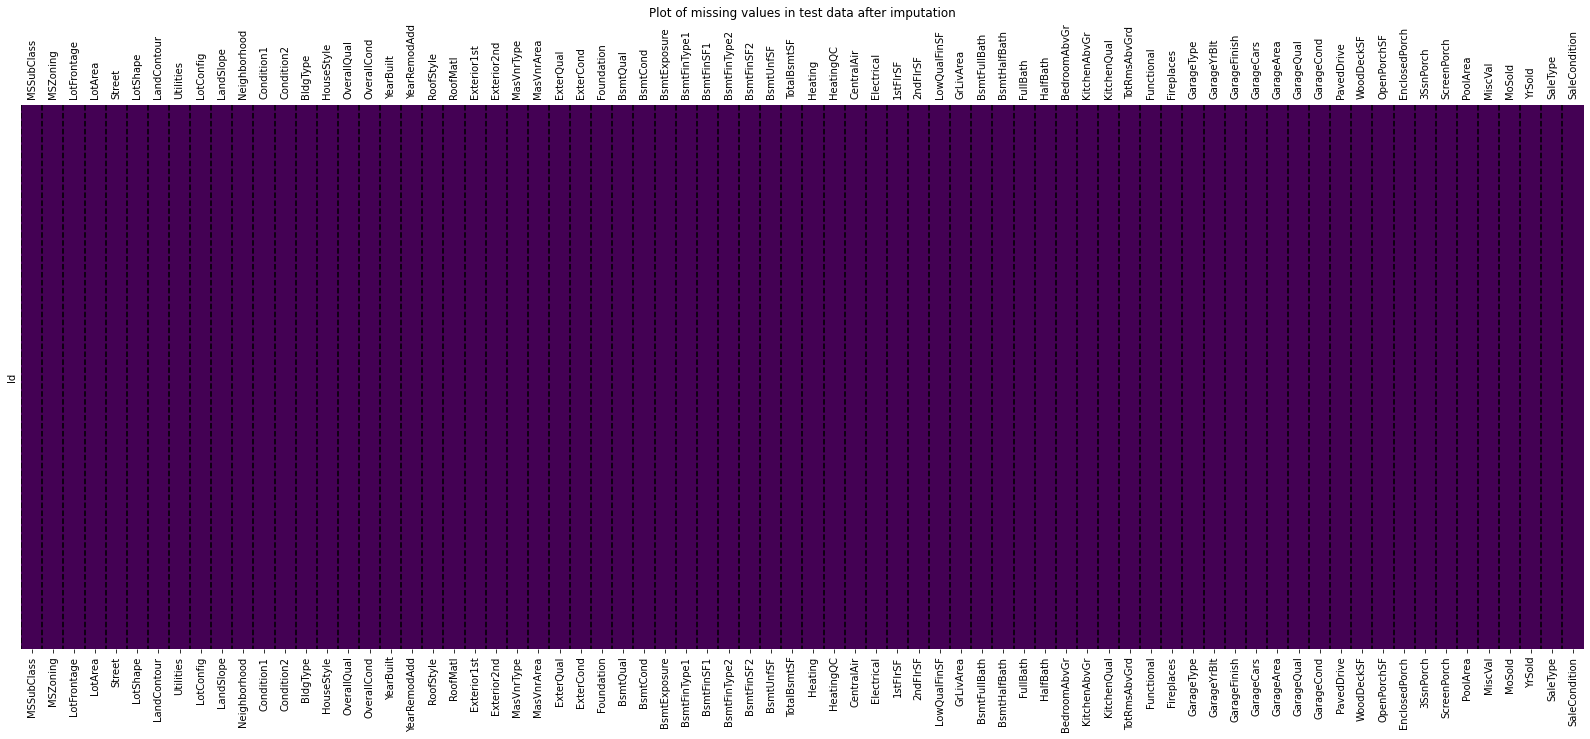

In [368]:
plot_missing(test_data, title="Plot of missing values in test data after imputation")

Now that we're done with imputing missing values, We'll start with EDA.

#### EDA

<AxesSubplot:>

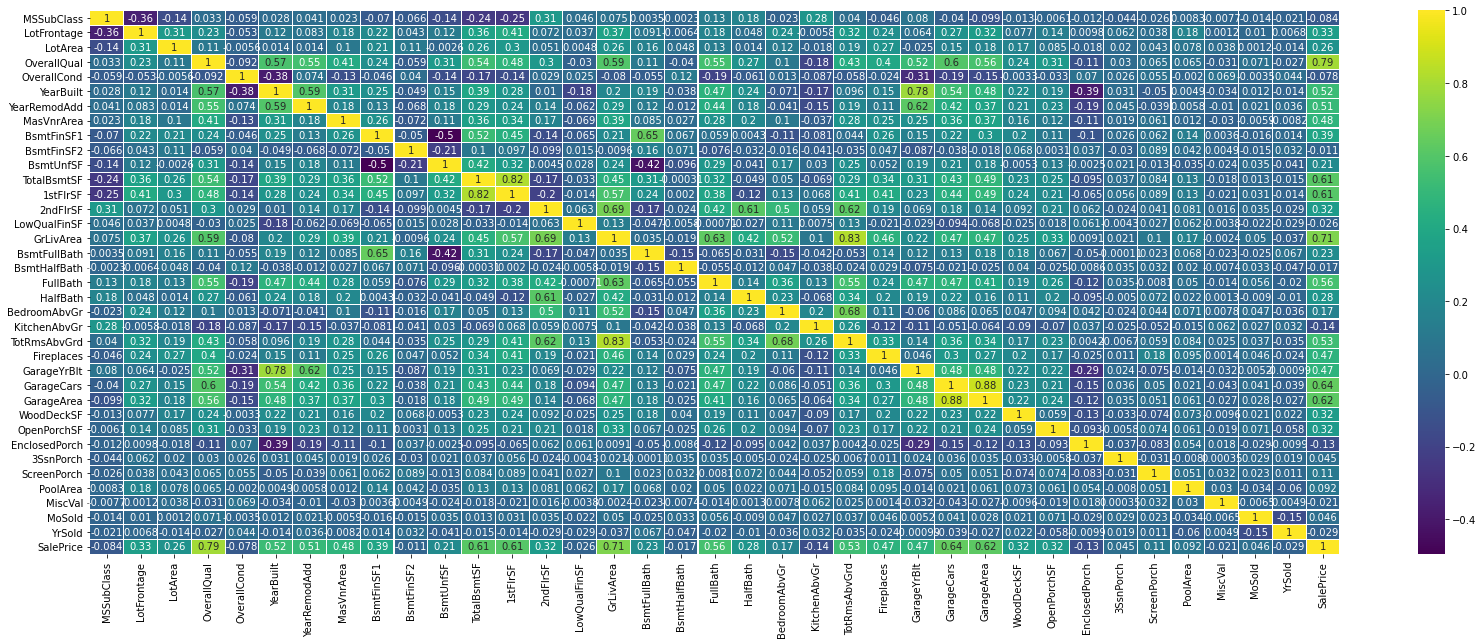

In [369]:
plt.figure(figsize=(28,10))
sns.heatmap(train_data.corr(), annot=True, cmap='viridis', linewidths=0.1)

We can straightaway remove the least correlated variables to SalePrice.

In [370]:
columns_to_remove = []

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

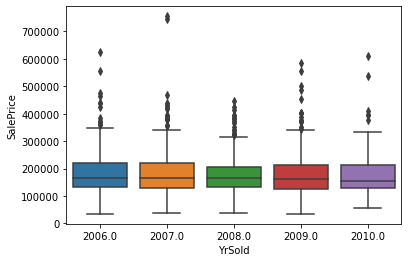

In [371]:
sns.boxplot(x="YrSold", y="SalePrice", data=train_data)

Apart from few outliers, We don't get any rewarding results from this column.

In [372]:
columns_to_remove.append("YrSold")
columns_to_remove.append("MoSold")

In [373]:
columns_to_remove.append("MiscVal")

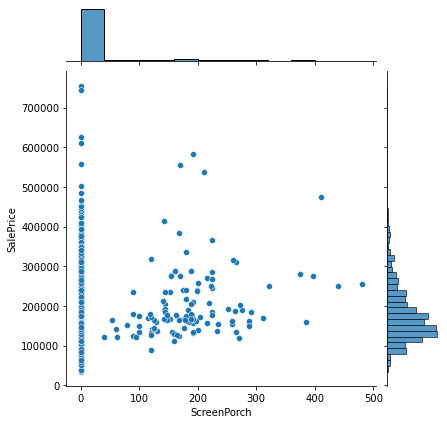

In [374]:
sns.jointplot(x="ScreenPorch", y="SalePrice", data=train_data)
plt.show()

Hmm... May be we can try not removing this feature. Anyway, we'll do the outlier elimination later.

In [375]:
columns_to_remove.append("3SsnPorch")

In [376]:
columns_to_remove.append("EnclosedPorch")

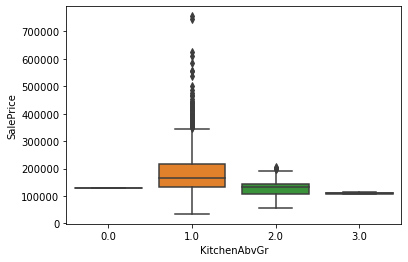

In [377]:
sns.boxplot(x="KitchenAbvGr", y="SalePrice", data=train_data)
plt.show()

Since most of the data has a value 1.0 for KitchenAbvGr it is obivous that the boxplot is dense at 1.0, we'll remove this column.

In [378]:
columns_to_remove.append("KitchenAbvGr")

In [379]:
train_data["BedroomAbvGr"].value_counts()

3.0    804
2.0    358
4.0    213
1.0     50
5.0     21
6.0      7
0.0      6
8.0      1
Name: BedroomAbvGr, dtype: int64

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

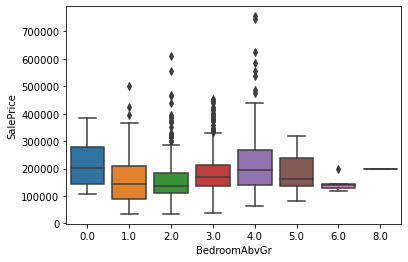

In [380]:
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=train_data)

In [381]:
columns_to_remove.append("BedroomAbvGr")

In [382]:
columns_to_remove.append("BsmtHalfBath")

In [383]:
columns_to_remove.append("LowQualFinSF")

In [384]:
columns_to_remove.append("BsmtFinSF2")

In [385]:
columns_to_remove.append("OverallCond")

In [386]:
columns_to_remove.append("MSSubClass")

In [387]:
columns_to_remove.append("PoolArea")

In [388]:
train_data.drop(columns=columns_to_remove, inplace=True)

In [389]:
test_data.drop(columns=columns_to_remove, inplace=True)

<AxesSubplot:>

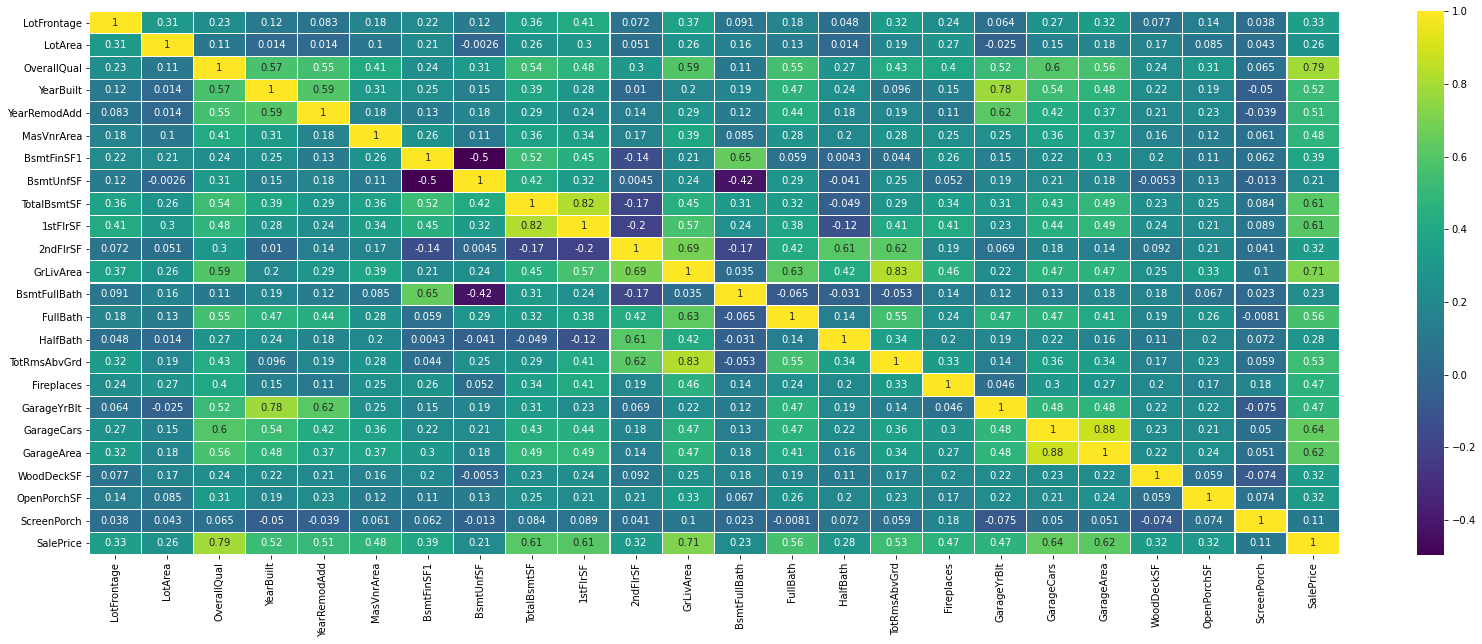

In [390]:
plt.figure(figsize=(28,10))
sns.heatmap(train_data.corr(), annot=True, cmap='viridis', linewidths=0.1)

Wow... This looks great with all the green square... But wait. We don't need multicollinearity. We should remove highly correlated columns as they won't improve our analysis. They're just an overhead that increases our time for training our model.

We'll first combine the YearBuilt and GarageYrBlt columns.

In [391]:
train_data["Year"] = (train_data["YearBuilt"] + train_data["GarageYrBlt"]) // 2

train_data.drop(["YearBuilt", "GarageYrBlt"], axis=1, inplace=True)

In [392]:
test_data["Year"] = (test_data["YearBuilt"] + test_data["GarageYrBlt"]) // 2

test_data.drop(["YearBuilt", "GarageYrBlt"], axis=1, inplace=True)

<AxesSubplot:>

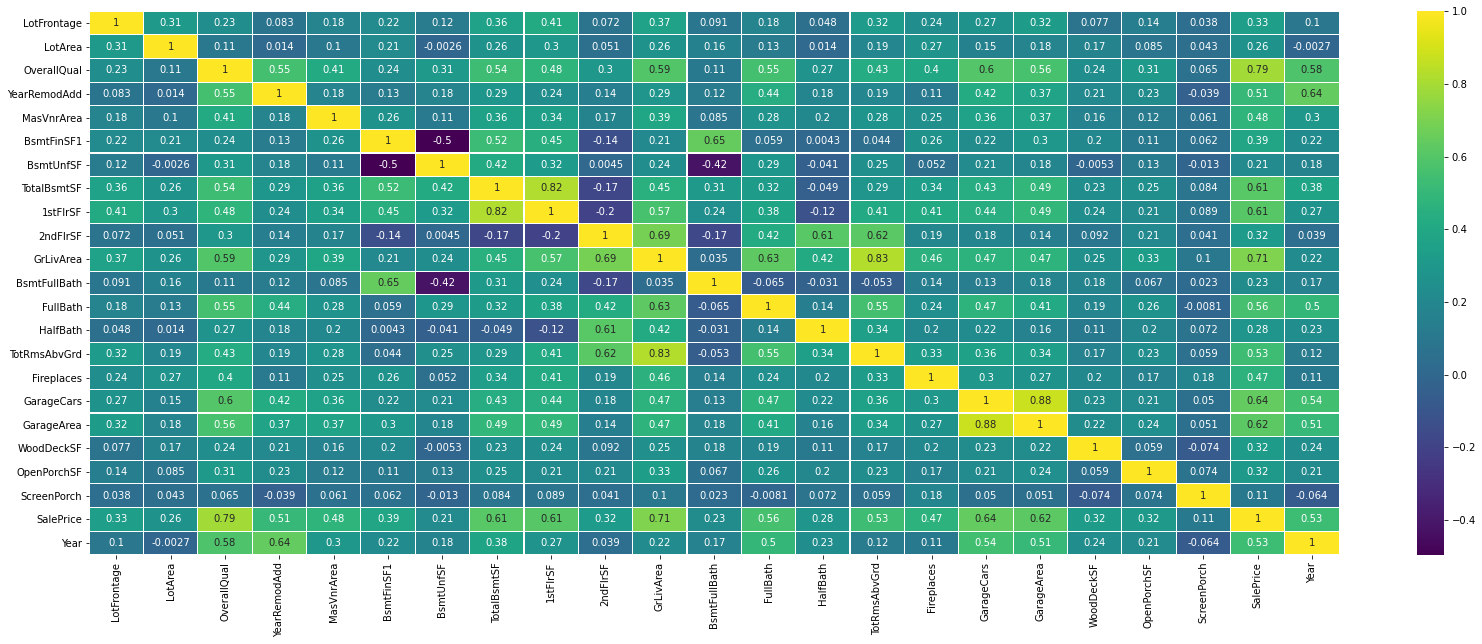

In [393]:
plt.figure(figsize=(28,10))
sns.heatmap(train_data.corr(), annot=True, cmap='viridis', linewidths=0.1)

In [394]:
columns = train_data.columns.to_list()

# Swap last two columns in the list
columns[-1], columns[-2] = columns[-2], columns[-1]

In [395]:
train_data = train_data[columns]

<AxesSubplot:>

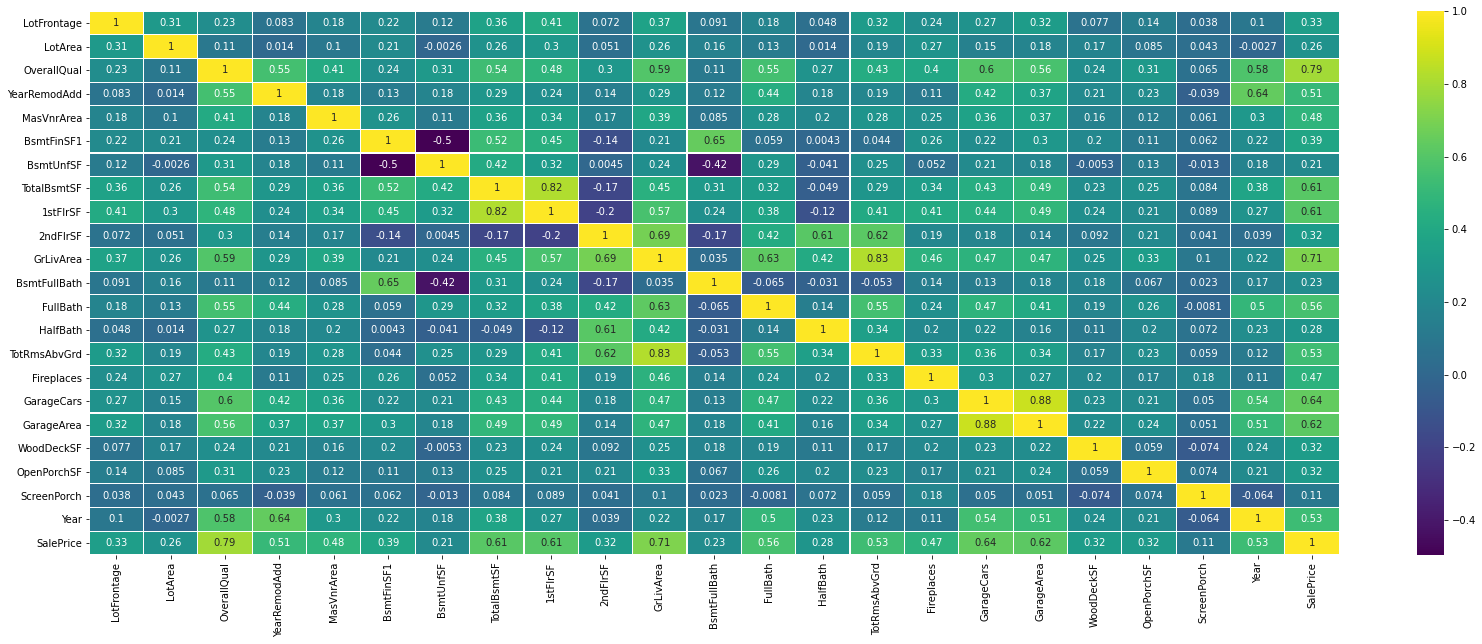

In [396]:
plt.figure(figsize=(28,10))
sns.heatmap(train_data.corr(), annot=True, cmap='viridis', linewidths=0.1)

In [397]:
numerical_train_data = train_data.select_dtypes(include=['int64', 'float64'])

<AxesSubplot:>

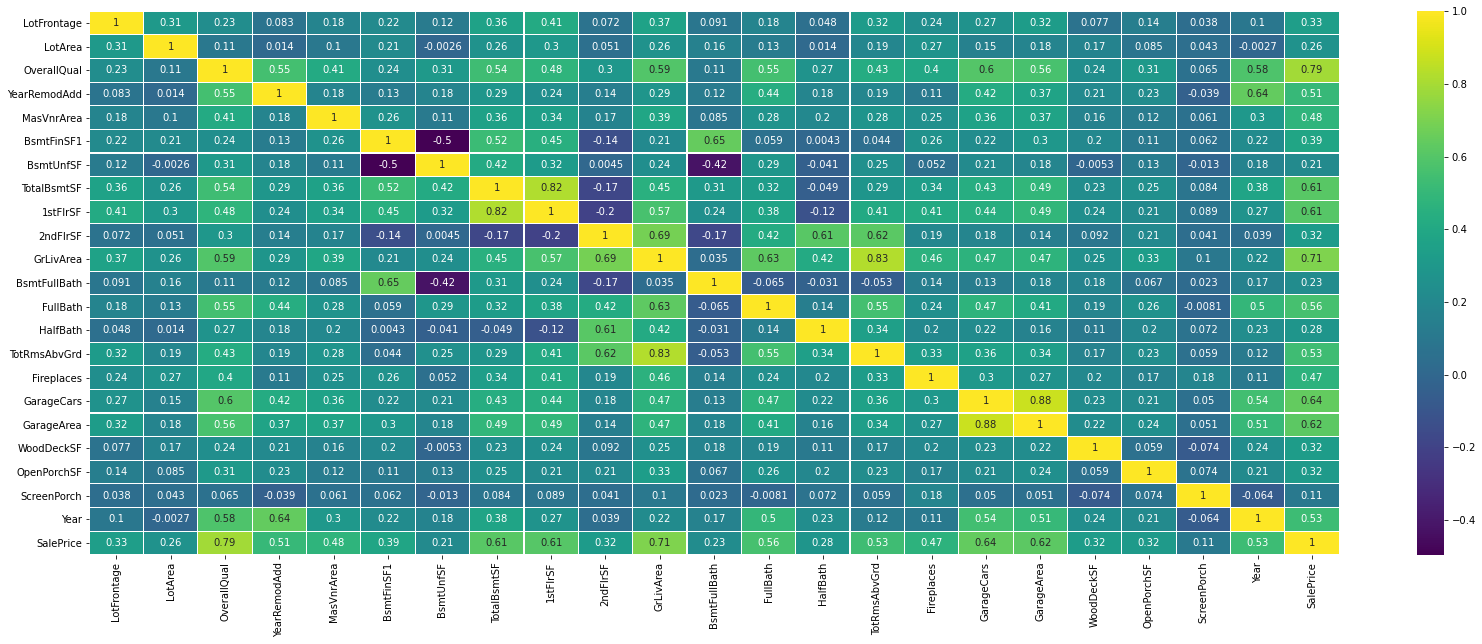

In [398]:
plt.figure(figsize=(28,10))
sns.heatmap(numerical_train_data.corr(), annot=True, cmap='viridis', linewidths=0.1)